In [ ]:
!pip3 install librosa
!pip3 install numba>=0.53

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "/content/whistler (1).mp3"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(680996,) 22050


In [ ]:
librosa.load(audio_data, sr=44100)

(array([0.0000000e+00, 1.5085531e-10, 3.9470605e-10, ..., 7.5010937e-03,
        1.6088143e-02, 1.5781028e-02], dtype=float32),
 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

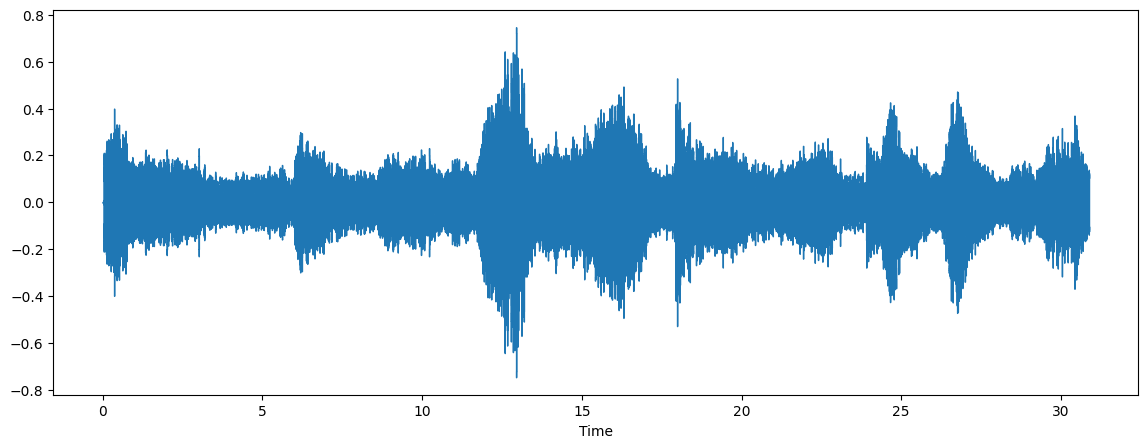

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

#**Short-time Fourier transform (STFT)**

In [ ]:
#https://librosa.org/doc-playground/main/generated/librosa.feature.chroma_stft.html?highlight=ibrosa%20feature%20chroma_stft#librosa.feature.chroma_stft
#Energy
librosa.feature.chroma_stft(y=x, sr=sr)

array([[0.16744493, 0.15875696, 0.31981736, ..., 0.37696442, 0.51528907,
        0.6623993 ],
       [0.18694001, 0.2624461 , 0.6873935 , ..., 0.63930166, 0.98703253,
        0.71582144],
       [0.34921032, 0.5158317 , 0.8928931 , ..., 0.714839  , 1.        ,
        0.6132292 ],
       ...,
       [0.3656563 , 0.41936725, 0.6692897 , ..., 0.37819862, 0.69651467,
        1.        ],
       [0.28936002, 0.23611113, 0.37056503, ..., 0.5734232 , 0.70530903,
        0.84677154],
       [0.21326962, 0.19983105, 0.3086337 , ..., 0.52476394, 0.64664817,
        0.893873  ]], dtype=float32)

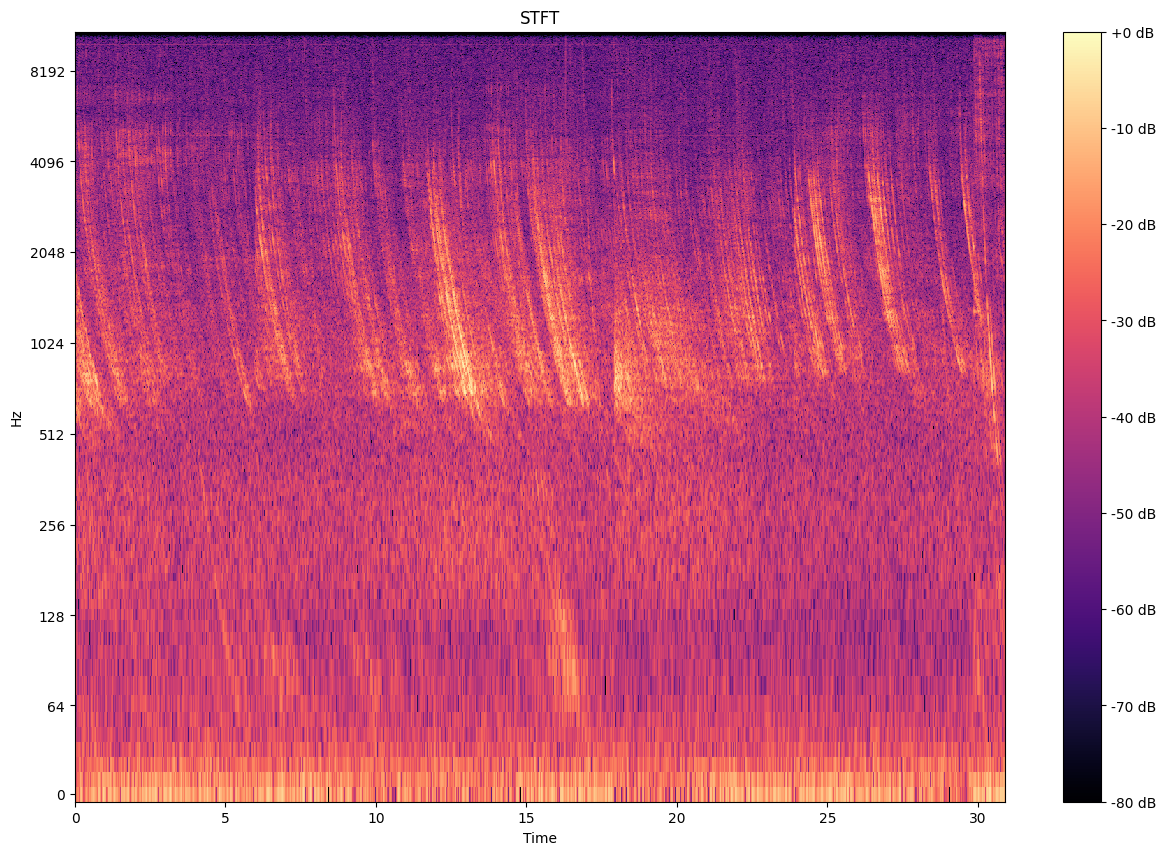

In [ ]:
stft_result = librosa.stft(y=x)

stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()

#**MFCCs**

(20, 1331)


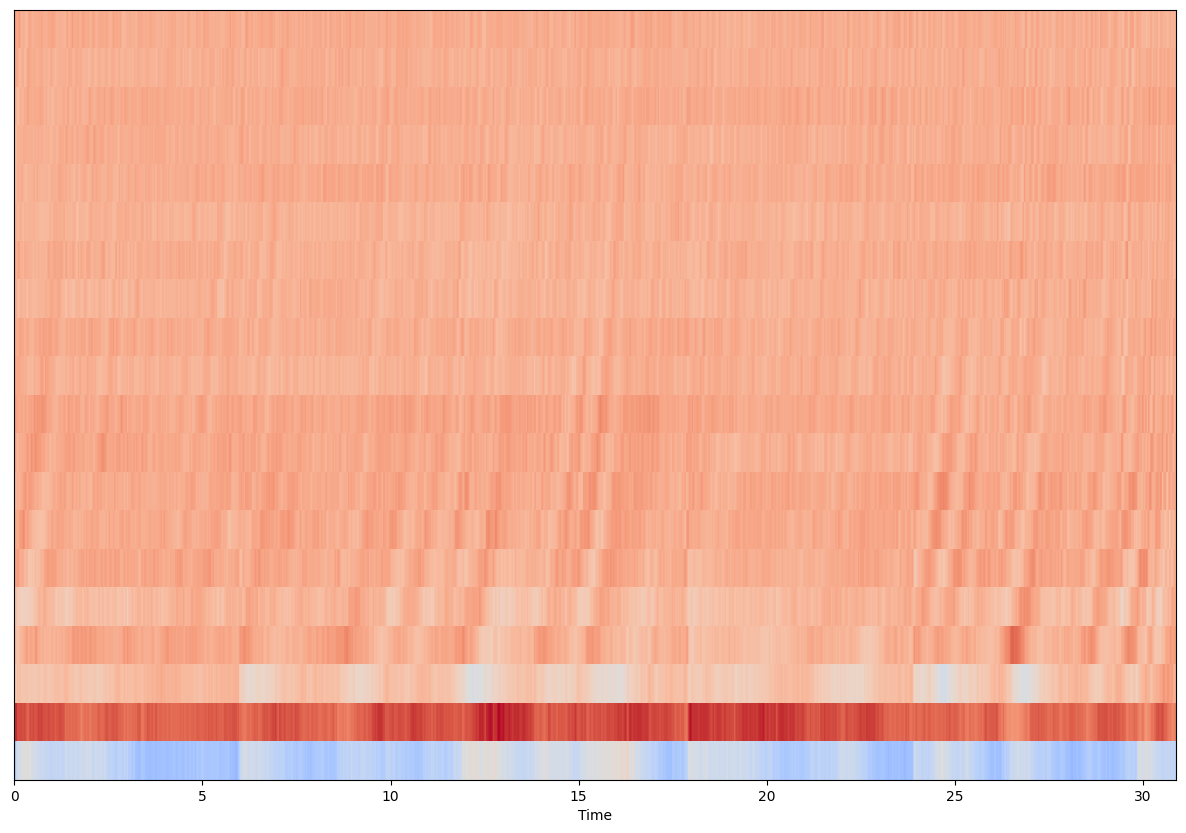

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
mfccs

array([[-2.78617310e+02, -1.44903198e+02, -1.10869736e+02, ...,
        -1.19934502e+02, -1.22812416e+02, -1.50585541e+02],
       [ 9.61987457e+01,  1.04695816e+02,  1.05462845e+02, ...,
         4.53885193e+01,  4.89740028e+01,  5.30149384e+01],
       [-2.49514160e+01, -2.85955009e+01, -3.15091515e+01, ...,
        -1.39072788e+00, -3.19638085e+00, -5.48904037e+00],
       ...,
       [-1.75661802e-01, -2.42136407e+00, -6.63303232e+00, ...,
         1.15198421e+01,  6.10302782e+00,  4.33414340e-01],
       [-1.01249480e+00,  4.41004992e+00,  1.04450502e+01, ...,
        -1.74430168e+00,  6.69698119e-01,  5.18314075e+00],
       [ 1.06407452e+01,  1.02645569e+01,  1.04409599e+01, ...,
        -6.73161364e+00, -4.90991116e+00, -3.40643406e+00]], dtype=float32)

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

(20, 1331)


In [ ]:
mfccs

array([[-2.78617310e+02, -1.44903198e+02, -1.10869736e+02, ...,
        -1.19934502e+02, -1.22812416e+02, -1.50585541e+02],
       [ 9.61987457e+01,  1.04695816e+02,  1.05462845e+02, ...,
         4.53885193e+01,  4.89740028e+01,  5.30149384e+01],
       [-2.49514160e+01, -2.85955009e+01, -3.15091515e+01, ...,
        -1.39072788e+00, -3.19638085e+00, -5.48904037e+00],
       ...,
       [-1.75661802e-01, -2.42136407e+00, -6.63303232e+00, ...,
         1.15198421e+01,  6.10302782e+00,  4.33414340e-01],
       [-1.01249480e+00,  4.41004992e+00,  1.04450502e+01, ...,
        -1.74430168e+00,  6.69698119e-01,  5.18314075e+00],
       [ 1.06407452e+01,  1.02645569e+01,  1.04409599e+01, ...,
        -6.73161364e+00, -4.90991116e+00, -3.40643406e+00]], dtype=float32)

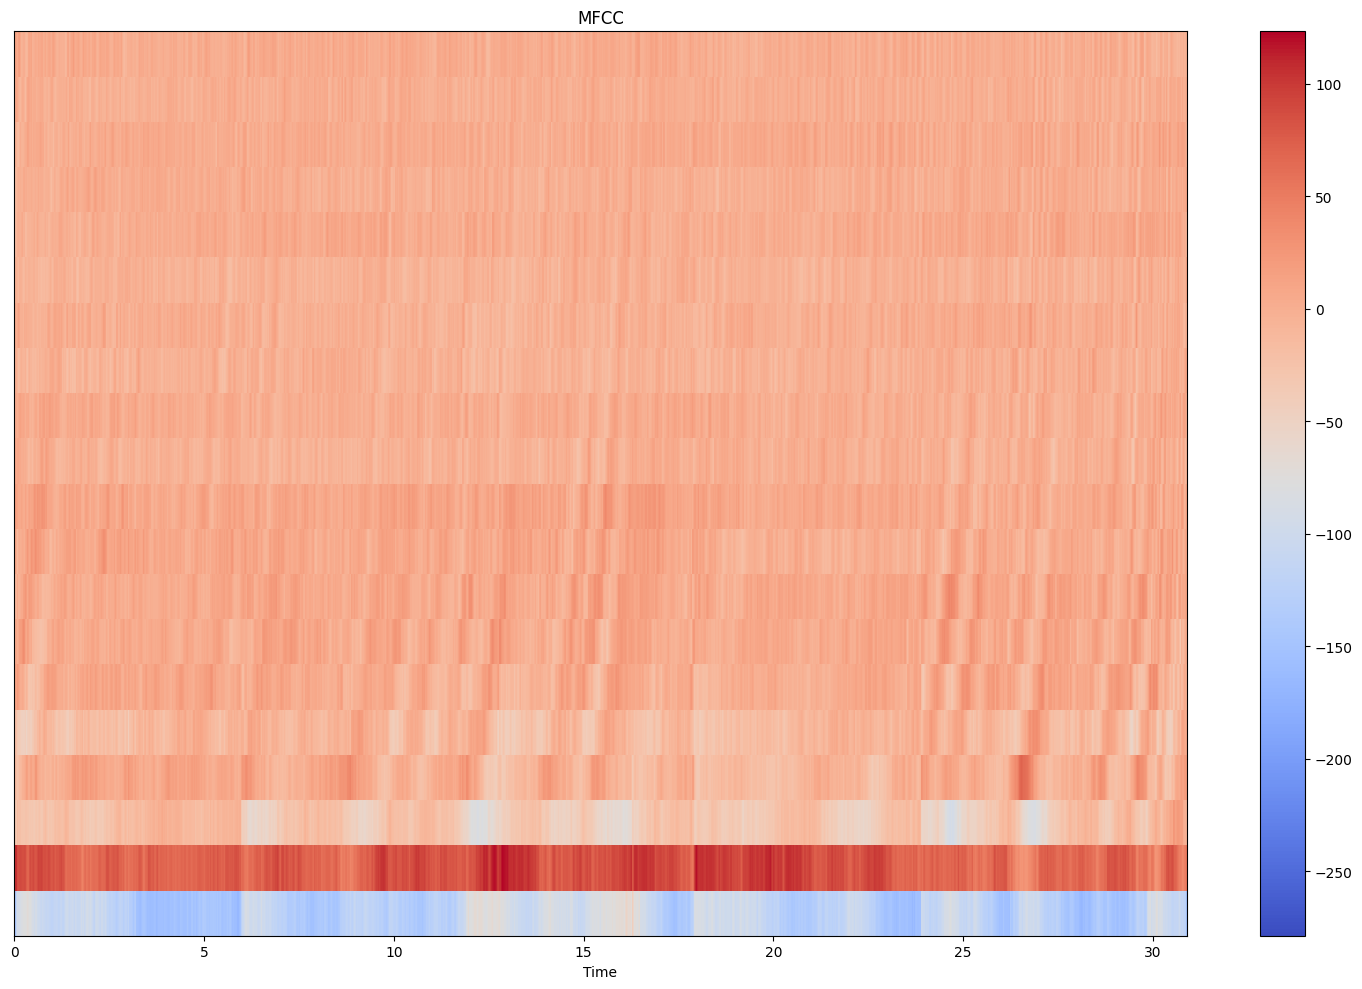

In [ ]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

#**Spectrogram**

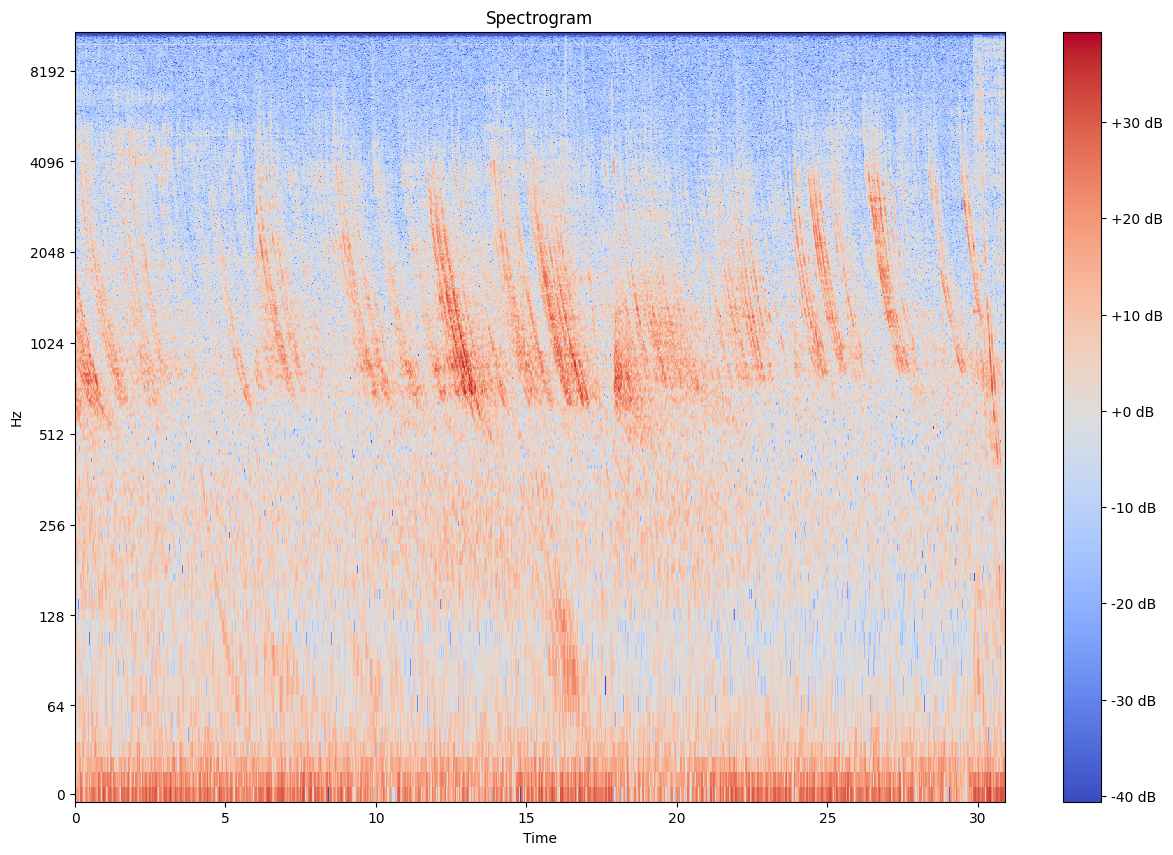

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [ ]:
X

array([[ 1.3394426e+00+0.0000000e+00j,  4.7157087e+00+0.0000000e+00j,
         6.3030782e+00+0.0000000e+00j, ...,
         3.5962654e+01+0.0000000e+00j,  3.8128712e+01+0.0000000e+00j,
         2.5476608e+01+0.0000000e+00j],
       [ 4.7086340e-01+1.2124516e+00j, -3.7538667e+00+2.0756147e+00j,
        -2.5996087e+00-5.2461332e-01j, ...,
        -1.6701126e+01-4.0779027e-01j, -2.2675919e+01+2.8868110e+00j,
        -1.4678571e+01-1.5064043e+01j],
       [-8.9931369e-01+7.8042364e-01j,  2.3803198e+00-2.9888940e+00j,
        -3.0903952e+00+1.2485433e+00j, ...,
        -1.4594613e+00+5.1786575e+00j,  3.7082005e+00-8.3226814e+00j,
         1.2828552e+00+1.1477153e+01j],
       ...,
       [ 9.0050031e-07+4.0415344e-07j, -1.9321094e-07+5.9613819e-07j,
        -1.1656336e-06-9.6828614e-08j, ...,
         1.2337783e-05-7.7252457e-07j,  4.6170875e-03+1.2192403e-03j,
        -1.0555230e-02-2.7756970e-03j],
       [ 1.6792389e-07+2.5364560e-07j,  8.2243764e-07-8.1003542e-08j,
        -1.6799038e-06

In [ ]:
Xdb

array([[  2.5384822,  13.47094  ,  15.991054 , ...,  31.117035 ,
         31.625042 ,  28.122833 ],
       [  2.2833643,  12.648105 ,   8.471519 , ...,  24.457504 ,
         27.181122 ,  26.458012 ],
       [  1.5162302,  11.6433525,  10.456907 , ...,  14.616262 ,
         19.191711 ,  21.250607 ],
       ...,
       [-40.610786 , -40.610786 , -40.610786 , ..., -40.610786 ,
        -40.610786 , -39.24025  ],
       [-40.610786 , -40.610786 , -40.610786 , ..., -40.610786 ,
        -40.610786 , -39.25409  ],
       [-40.610786 , -40.610786 , -40.610786 , ..., -40.610786 ,
        -40.610786 , -39.2508   ]], dtype=float32)

#**Chromagram**

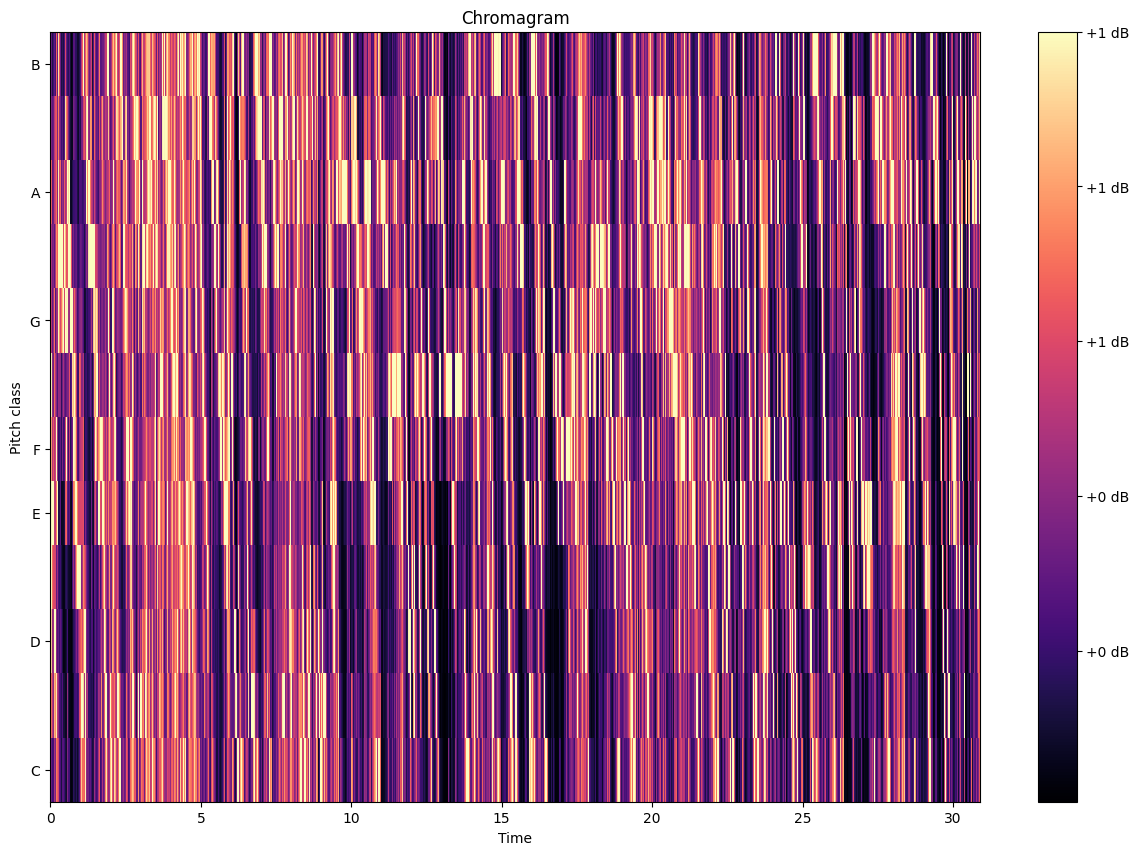

In [ ]:
chroma_db = librosa.feature.chroma_stft(y=x, sr=sr)

plt.figure(figsize=(15, 10))
librosa.display.specshow(chroma_db, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Chromagram')
plt.show()

In [ ]:
chroma_db

array([[0.16744493, 0.15875696, 0.31981736, ..., 0.37696442, 0.51528907,
        0.6623993 ],
       [0.18694001, 0.2624461 , 0.6873935 , ..., 0.63930166, 0.98703253,
        0.71582144],
       [0.34921032, 0.5158317 , 0.8928931 , ..., 0.714839  , 1.        ,
        0.6132292 ],
       ...,
       [0.3656563 , 0.41936725, 0.6692897 , ..., 0.37819862, 0.69651467,
        1.        ],
       [0.28936002, 0.23611113, 0.37056503, ..., 0.5734232 , 0.70530903,
        0.84677154],
       [0.21326962, 0.19983105, 0.3086337 , ..., 0.52476394, 0.64664817,
        0.893873  ]], dtype=float32)

#**Mel-Scaled Spectrogram**

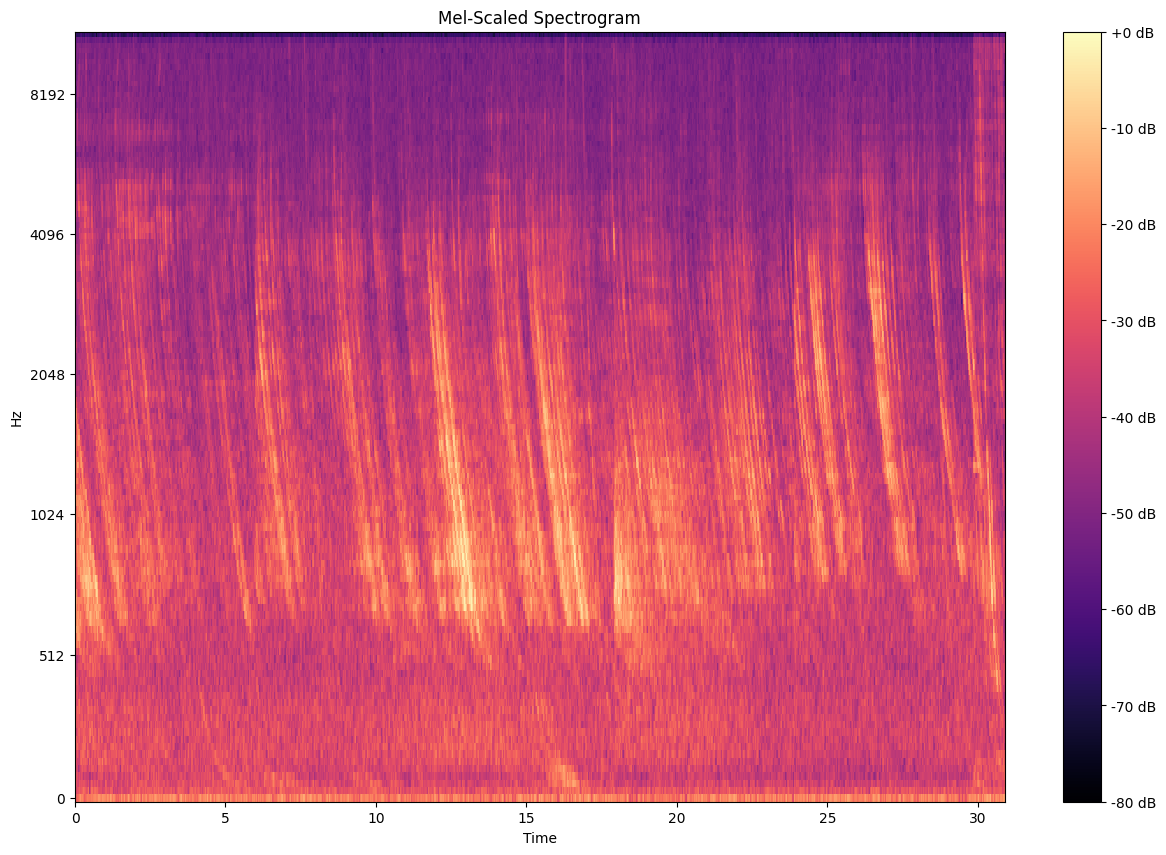

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)

mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Scaled Spectrogram')
plt.show()

In [ ]:
mel_spectrogram

array([[1.1427848e-01, 1.1176665e+00, 1.0281992e+00, ..., 5.8710055e+00,
        1.1639398e+01, 1.1991382e+01],
       [6.7488983e-02, 2.9396892e-01, 3.0430904e-01, ..., 2.3656297e-01,
        4.5493469e-01, 8.0710131e-01],
       [6.4815909e-02, 5.9949040e-01, 5.3416842e-01, ..., 1.6362579e-01,
        2.9034302e-01, 5.1595622e-01],
       ...,
       [3.6953839e-05, 9.0219820e-04, 2.5563613e-03, ..., 2.2244597e-02,
        2.7351113e-02, 5.9368838e-02],
       [3.1750373e-05, 6.9928402e-04, 1.5336534e-03, ..., 7.5041796e-03,
        5.9854579e-03, 8.7471753e-03],
       [3.0646383e-06, 8.4065927e-05, 1.4160993e-04, ..., 1.4233500e-03,
        8.1233826e-04, 7.9717103e-04]], dtype=float32)

In [ ]:
mel_spectrogram_db

array([[-36.145298, -26.24182 , -26.604168, ..., -19.037815, -16.065636,
        -15.936249],
       [-38.43261 , -32.041927, -31.891792, ..., -32.985474, -30.14545 ,
        -27.65566 ],
       [-38.608124, -28.947119, -29.448158, ..., -34.586426, -32.09583 ,
        -29.598812],
       ...,
       [-71.04835 , -57.17192 , -52.64872 , ..., -43.252693, -42.35519 ,
        -38.989357],
       [-71.70745 , -58.278404, -54.86767 , ..., -47.97191 , -48.953964,
        -47.306263],
       [-80.      , -67.478745, -65.214005, ..., -55.191826, -57.62757 ,
        -57.709427]], dtype=float32)

#**Beat Tracker**

Detected Tempo: [143.5546875] BPM


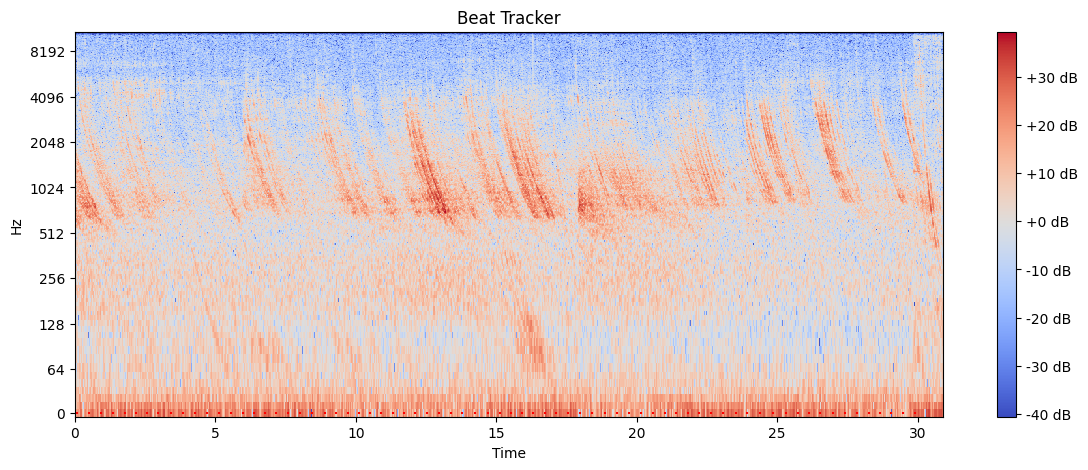

In [ ]:
tempo, beats = librosa.beat.beat_track(y=x, sr=sr)

print(f"Detected Tempo: {tempo} BPM")

# Plot beat locations on the waveform
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.vlines(librosa.frames_to_time(beats, sr=sr), -1, 1, color='r')
plt.colorbar(format='%+2.0f dB')
plt.title('Beat Tracker')
plt.show()

#**Constant-Q Transform**

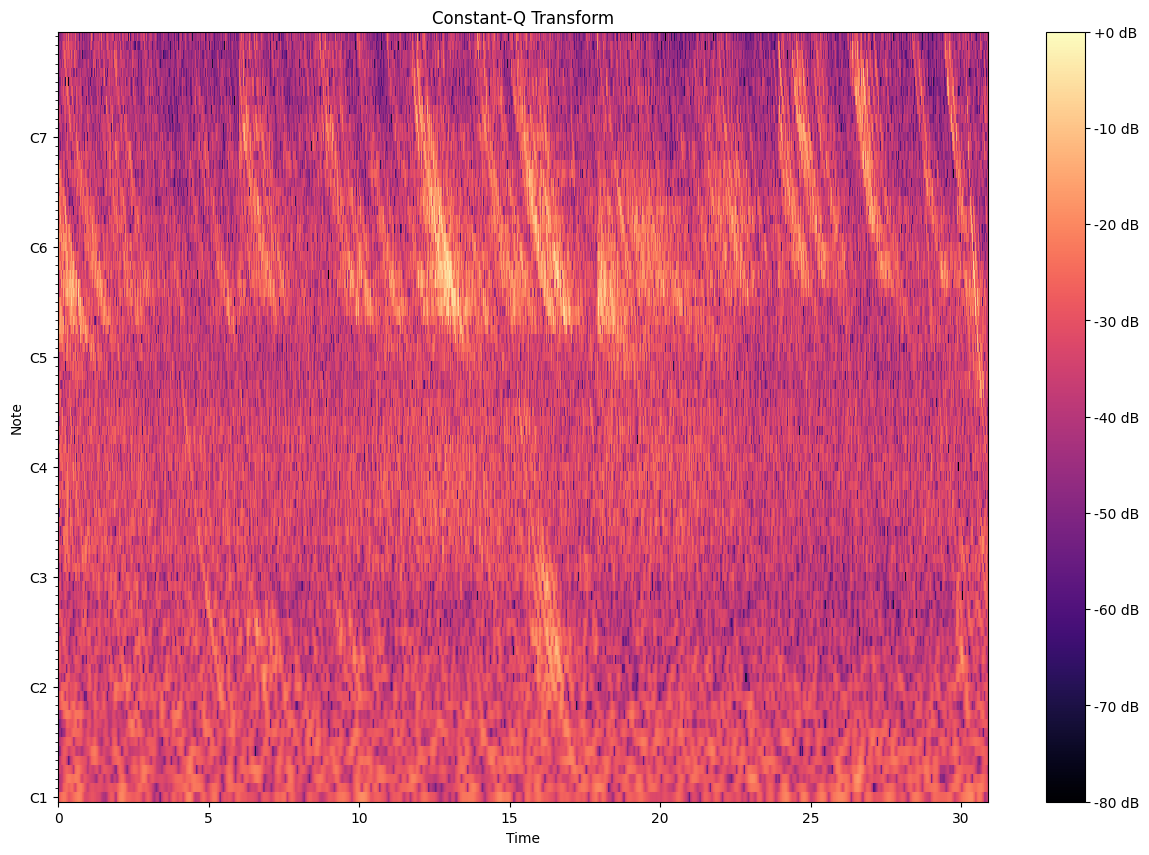

In [ ]:
CQT = librosa.cqt(y=x, sr=sr)

CQT_db = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(CQT_db, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform')
plt.show()

In [ ]:
CQT

array([[ 7.8686833e-02-8.01819488e-02j, -9.3575150e-02-8.44540745e-02j,
        -8.9704819e-02+1.09205164e-01j, ...,
        -3.9529905e-02-3.65523249e-03j, -1.9253578e-02+4.37581502e-02j,
         4.0242489e-02+3.14190611e-02j],
       [ 1.4438759e-02-5.55895977e-02j, -5.0519966e-02-2.22359356e-02j,
        -2.3464978e-02+4.15081754e-02j, ...,
        -1.0818114e-01-5.68604805e-02j, -8.5209653e-02+6.36623427e-02j,
         1.9821746e-02+8.94394889e-02j],
       [ 1.6562035e-02-3.41984704e-02j, -1.2731788e-02-3.34116593e-02j,
        -3.2346472e-02-1.31964758e-02j, ...,
        -3.1592794e-02-1.09876789e-01j, -8.6561538e-02-2.34036706e-02j,
        -4.8079140e-02+4.80902456e-02j],
       ...,
       [ 1.7588517e-08-2.22681970e-10j, -3.7492106e-03+3.16700526e-03j,
        -8.5755419e-03-2.20933780e-02j, ...,
        -2.7450889e-02+8.14912375e-04j,  2.4563536e-02-2.61692307e-03j,
         3.7366100e-02-4.67604585e-02j],
       [ 8.2642071e-09-7.73806086e-09j,  1.8426959e-03+1.30918541e-0

In [ ]:
CQT_db

array([[-29.264652, -28.264599, -27.271137, ..., -38.30002 , -36.68574 ,
        -36.11474 ],
       [-35.092106, -35.437206, -36.708496, ..., -28.533085, -29.739506,
        -31.036686],
       [-38.68033 , -39.208714, -39.41034 , ..., -29.112415, -31.222607,
        -33.625072],
       ...,
       [-80.      , -56.457775, -42.780796, ..., -41.500553, -42.420673,
        -34.733322],
       [-80.      , -63.19173 , -45.182064, ..., -50.210075, -46.24503 ,
        -34.527424],
       [-80.      , -59.400303, -48.5499  , ..., -36.85242 , -37.969   ,
        -43.089466]], dtype=float32)